# **TRABAJO DE GRADO**
Rosinver Alejandro Vasquez Duran

In [ ]:
!nvidia-smi

Mon Feb 27 20:40:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
 #@title Librerias necesarias 🤗

#@markdown Pandas, Numpy y sklearn
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from google.colab import auth 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title Importar CSV de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Abrir data CSV de Google Drive
df =pd.read_csv("/content/drive/MyDrive/data/data2.csv")
df.head()

,capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg,pH agua:suelo 2.5:1.0,Materia orgánica (MO) %,Fósforo (P) Bray II mg/kg,Azufre (S) Fosfato monocalcico mg/kg,Calcio (Ca) intercambiable cmol(+)/kg,Magnesio (Mg) intercambiable cmol(+)/kg,Acidez (Al+H) KCL cmol(+)/kg,Aluminio (Al) intercambiable cmol(+)/kg,Potasio (K) intercambiable cmol(+)/kg,Sodio (Na) intercambiable cmol(+)/kg,Conductividad electrica (CE) relacion 2.5:1.0 dS/m,Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg
0,8.079447,4.87,16.041251,64.199200,5.523560,2.234775,0.346672,5.028454,4.643150,0.313188,0.156357,0.374107,1685.377,4.124,17.619,8.567,0.302575
1,5.230228,4.68,2.119437,9.167087,15.209424,1.727216,0.412929,2.835518,2.522577,0.153612,0.100953,0.143196,605.352,1.156,3.864,1.252,0.109442
2,4.425282,4.52,1.509147,36.192439,10.104712,1.247214,0.293088,2.702921,2.512527,0.079000,0.103058,0.131043,626.978,1.192,2.353,1.000,0.152361
3,3.546697,5.15,2.098749,12.096665,5.261780,1.641690,0.457463,1.234164,1.005011,0.113380,0.140000,0.161690,415.316,2.743,8.691,14.761,0.152361
4,3.986192,4.79,1.222105,7.819482,3.298429,2.016842,0.379801,1.387160,1.115562,0.096556,0.105833,0.117305,324.654,1.781,3.524,1.724,0.173820


In [ ]:
#@title Importar test CSV de Google Drive
df_test = pd.read_csv("/content/drive/MyDrive/data/test.csv")
df_test.head()

,capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg,pH agua:suelo 2.5:1.0,Materia orgánica (MO) %,Fósforo (P) Bray II mg/kg,Azufre (S) Fosfato monocalcico mg/kg,Calcio (Ca) intercambiable cmol(+)/kg,Magnesio (Mg) intercambiable cmol(+)/kg,Acidez (Al+H) KCL cmol(+)/kg,Aluminio (Al) intercambiable cmol(+)/kg,Potasio (K) intercambiable cmol(+)/kg,Sodio (Na) intercambiable cmol(+)/kg,Conductividad electrica (CE) relacion 2.5:1.0 dS/m,Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg
0,6.505925,5.06,1.989168,25.137317,2.304217,1.764216,0.950770,3.585438,3.163992,0.105502,0.140000,0.067635,392.084000,3.024,24.277000,3.108,0.166963
1,7.860289,4.92,1.117649,4.529839,1.551205,2.419223,1.177238,4.015271,3.469844,0.125309,0.123249,0.088771,300.091000,3.479,55.649000,1.666,0.211487
2,6.286261,5.08,10.450875,150.643079,17.424545,3.294720,0.246720,1.648181,1.412235,1.036800,0.059840,0.434300,478.000000,9.300,10.000000,5.000,0.284466
3,5.516175,5.24,5.069692,16.928068,3.146791,3.707053,1.066921,0.389727,0.193072,0.212473,0.140000,0.179128,506.869301,1.000,4.224924,1.000,0.211077
4,9.604411,5.44,4.542003,7.166455,7.586562,7.985246,0.445877,0.797883,0.505220,0.167566,0.207839,0.290092,972.994000,1.078,11.372000,1.779,0.207320


In [ ]:
#quitar valores NaN en el dataset
df = df.dropna()
df_test = df_test.dropna()


In [ ]:
df.describe()

,capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg,pH agua:suelo 2.5:1.0,Materia orgánica (MO) %,Fósforo (P) Bray II mg/kg,Azufre (S) Fosfato monocalcico mg/kg,Calcio (Ca) intercambiable cmol(+)/kg,Magnesio (Mg) intercambiable cmol(+)/kg,Acidez (Al+H) KCL cmol(+)/kg,Aluminio (Al) intercambiable cmol(+)/kg,Potasio (K) intercambiable cmol(+)/kg,Sodio (Na) intercambiable cmol(+)/kg,Conductividad electrica (CE) relacion 2.5:1.0 dS/m,Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg
count,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000,18856.000000
mean,5.981858,4.918032,6.127322,22.970365,12.041198,2.516205,0.827462,2.236069,1.782121,0.289210,0.140758,0.348010,430.594947,2.719117,10.239592,3.744289,0.223222
std,4.049285,0.349279,5.907580,53.267173,29.739371,2.845919,1.103715,1.993960,1.694569,0.352362,0.201593,0.660733,500.177142,3.826355,20.119839,10.319579,0.250361
min,0.532716,0.000000,0.010000,0.088036,0.000000,0.031200,0.006336,0.022806,0.006857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.355694,4.690000,2.190000,3.870000,3.839479,0.773760,0.251975,0.887262,0.612862,0.096106,0.067174,0.127873,110.927500,1.000000,2.400000,1.000000,0.109833
50%,5.008449,4.950000,3.859296,5.891789,6.500000,1.640776,0.481686,1.715767,1.329722,0.173575,0.140000,0.202377,288.689500,1.800000,5.278000,1.500000,0.171942
75%,7.428274,5.200000,8.133379,17.823794,11.769610,3.220190,0.960000,2.885955,2.356247,0.331728,0.140000,0.333949,567.026250,3.120000,10.880000,3.450000,0.263283
max,111.011810,6.580000,68.089436,1708.360000,1401.904762,103.814240,26.816477,28.306478,25.812844,8.307200,9.091082,20.660440,7972.920000,221.153925,883.370000,552.381000,9.229649


In [ ]:
#info de las filas y columnas
datos = df.shape
test = df_test.shape
print("datos - numero filas / columnas",datos)
print("test - numero filas /columnas",test)

datos - numero filas / columnas (18856, 17)
test - numero filas /columnas (2095, 17)


In [ ]:
#mostrar columnas
df.columns

Index(['capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg',
       'pH agua:suelo 2.5:1.0', 'Materia orgánica (MO) %',
       'Fósforo (P) Bray II mg/kg', 'Azufre (S) Fosfato monocalcico mg/kg',
       'Calcio (Ca) intercambiable cmol(+)/kg',
       'Magnesio (Mg) intercambiable cmol(+)/kg',
       'Acidez (Al+H) KCL cmol(+)/kg',
       'Aluminio (Al) intercambiable cmol(+)/kg',
       'Potasio (K) intercambiable cmol(+)/kg',
       'Sodio (Na) intercambiable cmol(+)/kg',
       'Conductividad electrica (CE) relacion 2.5:1.0 dS/m',
       'Hierro (Fe) disponible olsen mg/kg', 'Cobre (Cu) disponible mg/kg',
       'Manganeso (Mn) disponible Olsen mg/kg',
       'Zinc (Zn) disponible Olsen mg/kg', 'Boro (B) disponible mg/kg'],
      dtype='object')

In [ ]:
#mostrar la primera fila del dataset
df.head(1)

,capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg,pH agua:suelo 2.5:1.0,Materia orgánica (MO) %,Fósforo (P) Bray II mg/kg,Azufre (S) Fosfato monocalcico mg/kg,Calcio (Ca) intercambiable cmol(+)/kg,Magnesio (Mg) intercambiable cmol(+)/kg,Acidez (Al+H) KCL cmol(+)/kg,Aluminio (Al) intercambiable cmol(+)/kg,Potasio (K) intercambiable cmol(+)/kg,Sodio (Na) intercambiable cmol(+)/kg,Conductividad electrica (CE) relacion 2.5:1.0 dS/m,Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg
0,8.079447,4.87,16.041251,64.1992,5.52356,2.234775,0.346672,5.028454,4.64315,0.313188,0.156357,0.374107,1685.377,4.124,17.619,8.567,0.302575


# Preparacion de datos 

In [ ]:
#quitar variable a predecir
features = df.drop(['capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg'], axis=1)

target = df['capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg']

In [ ]:
#
features_test = df_test.drop(['capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg'], axis=1)

target_test = df_test['capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg']

In [ ]:
# inicializando listas vacias para agregar todos los nombres de los modelos y sus correspondientes nombres
acc = []
model = []

In [ ]:
# Dividiendo en datos de entrenamiento y prueba

from sklearn.model_selection import train_test_split
# random_state sirve para que siempre se genere la misma particion de datos 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
#saber el tamaño de los datos de entrenamiento y prueba
print(Xtrain.shape)
print(Xtest.shape)

(15084, 16)
(3772, 16)


In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15084 entries, 16487 to 2575
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   pH agua:suelo 2.5:1.0                               15084 non-null  float64
 1   Materia orgánica (MO) %                             15084 non-null  float64
 2   Fósforo (P) Bray II mg/kg                           15084 non-null  float64
 3   Azufre (S) Fosfato monocalcico mg/kg                15084 non-null  float64
 4   Calcio (Ca) intercambiable cmol(+)/kg               15084 non-null  float64
 5   Magnesio (Mg) intercambiable cmol(+)/kg             15084 non-null  float64
 6   Acidez (Al+H) KCL cmol(+)/kg                        15084 non-null  float64
 7   Aluminio (Al) intercambiable cmol(+)/kg             15084 non-null  float64
 8   Potasio (K) intercambiable cmol(+)/kg               15084 non-null  float

# Ramdom forest regression 
Random Forest es un técnica de aprendizaje automático supervisada basada en árboles de decisión. Su principal ventaja es que obtiene un mejor rendimiento de generalización para un rendimiento durante entrenamiento similar
 [ramdom forest regression](https://www.iartificial.net/random-forest-bosque-aleatorio/)

In [ ]:
#ramdom forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training sets
rfr.fit(Xtrain, Ytrain)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions using the testing set
y_pred = rfr.predict(Xtest)
# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
rf_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))

Mean squared error: 1.02
Coefficient of determination: 0.94
Mean absolute error: 0.19


In [ ]:
# Realizar predicciones en el conjunto de datos de prueba
y_pred_test = rfr.predict(features_test)

# Calcular el error cuadrático medio en el conjunto de datos de prueba
mse_test = mean_squared_error(target_test, y_pred_test)
print('Error cuadrático medio en el conjunto de datos de prueba: %.2f' % mse_test)

# Calcular el coeficiente de determinación en el conjunto de datos de prueba
r2_test = r2_score(target_test, y_pred_test)
print('Coeficiente de determinación en el conjunto de datos de prueba: %.2f' % r2_test)

# Calcular el error absoluto medio en el conjunto de datos de prueba
mae_test = mean_absolute_error(target_test, y_pred_test)
print('Error absoluto medio en el conjunto de datos de prueba: %.2f' % mae_test)

Error cuadrático medio en el conjunto de datos de prueba: 2.69
Coeficiente de determinación en el conjunto de datos de prueba: 0.89
Error absoluto medio en el conjunto de datos de prueba: 0.25


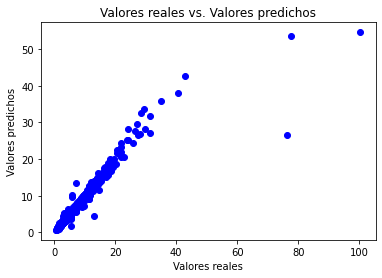

In [ ]:

# Graficar los valores predichos y reales en el conjunto de datos de prueba
plt.scatter(target_test, y_pred_test,color='blue')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos')
plt.show()

In [ ]:
# Cross validation score (Random Forest Regression)
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
score_rfr = cross_val_score(rfr,features,target,cv=5)
score_rfr

array([0.97797714, 0.97461615, 0.9892529 , 0.93699676, 0.97104801])

In [ ]:
# Cross validation score (Random Forest Regression)
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
score = cross_val_score(rfr,features_test,target_test,cv=5)
print(score.mean())

0.8575822438803004


In [ ]:
test_score = rfr.score(features, target)
test_score

0.985333112936712

In [ ]:
test_score = rfr.score(features_test, target_test)
test_score

0.894429430906135

In [ ]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model_rfr.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfr, file)

In [ ]:
# Cargamos el modelo
import pickle
pkl_filename = "pickle_model_rfr.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [ ]:
#mostrar las entradas del modelo
rfr.feature_importances_


array([0.01411257, 0.00245457, 0.00203757, 0.09838188, 0.53673752,
       0.05552114, 0.12227144, 0.0134767 , 0.00693047, 0.02044576,
       0.10442077, 0.00158401, 0.00355915, 0.00881394, 0.00177479,
       0.00747772])

In [ ]:
#realizar predicciones con el modelo ingresando los datos de entrada
data = np.array([[4.87, 16.041250728069, 64.1991999999999, 5.52356020942408, 2.23477545, 0.34667245, 5.02845393817867, 4.6431499301287, 0.313187687999999, 0.156357459999999, 0.3741072, 1685.377, 4.124, 17.619, 8.567, 0.302575107296137]])
prediction = rfr.predict(data)
print(prediction)

[8.58253787]


# Regresion polinomica con sklearn

In [ ]:
#regresion polinomica con sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrain)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Ytrain)


LinearRegression()

In [ ]:
# Make predictions using the testing set
y_pred = lin_reg_2.predict(poly_reg.fit_transform(Xtest))

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
pr_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))

Mean squared error: 0.04
Coefficient of determination: 1.00
Mean absolute error: 0.06


In [ ]:
# Realizar predicciones en el conjunto de datos de prueba
y_pred_test = lin_reg_2.predict(poly_reg.fit_transform(features_test))

# Calcular el error cuadrático medio en el conjunto de datos de prueba
mse_test = mean_squared_error(target_test, y_pred_test)
print('Error cuadrático medio en el conjunto de datos de prueba: %.2f' % mse_test)

# Calcular el coeficiente de determinación en el conjunto de datos de prueba
r2_test = r2_score(target_test, y_pred_test)
print('Coeficiente de determinación en el conjunto de datos de prueba: %.2f' % r2_test)

# Calcular el error absoluto medio en el conjunto de datos de prueba
mae_test = mean_absolute_error(target_test, y_pred_test)
print('Error absoluto medio en el conjunto de datos de prueba: %.2f' % mae_test)

Error cuadrático medio en el conjunto de datos de prueba: 0.43
Coeficiente de determinación en el conjunto de datos de prueba: 0.98
Error absoluto medio en el conjunto de datos de prueba: 0.08


In [ ]:
# Cross validation score (Random Forest Regression)
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
score_lin_reg_2 = cross_val_score(lin_reg_2,features,target,cv=5)
score_lin_reg_2

array([0.99968059, 0.9996652 , 0.99979299, 0.99983004, 0.9847208 ])

In [ ]:
# Cross validation score (Random Forest Regression)
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
score = cross_val_score(lin_reg_2,features_test,target_test,cv=5)
score

array([0.99794585, 0.99880834, 0.99634614, 0.99597433, 0.99951314])

In [ ]:
#realizar predicciones con el modelo polinomico ingresando los datos de entrada
data = np.array([[4.87, 16.041250728069, 64.1991999999999, 5.52356020942408, 2.23477545,
                  0.34667245, 5.02845393817867, 4.6431499301287, 0.313187687999999, 0.156357459999999,
                  0.3741072, 1685.377, 4.124, 17.619, 8.567, 0.302575107296137]])
data = poly_reg.fit_transform(data)
pred = lin_reg_2.predict(data)
print(pred)

In [ ]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model_poly_reg.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lin_reg_2, file)

In [ ]:
# Cargamos el modelo
import pickle
pkl_filename = "pickle_model_poly_reg.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

# crear modelo red neuronal learnig para predecir la capacidad de intercambio cationico (CICE)

In [ ]:
#crear modelo red neuronal learnig para predecir la capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=100)
#hidden_layer_sizes=(100,100,100) es la cantidad de neuronas en cada capa oculta
# Train the model using the training sets
# valores de 15 
mlp.fit(Xtrain, Ytrain)

# Make predictions using the testing set
y_pred = mlp.predict(Xtest)

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
nn_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))
#como funciona Red Neuronal


Mean squared error: 0.95
Coefficient of determination: 0.95
Mean absolute error: 0.46


In [ ]:
# Cross validation score (Random Forest Regression)
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
score = cross_val_score(mlp,features,target,cv=5)
score

array([0.95556434, 0.93580566, 0.88352805, 0.970684  , 0.9520005 ])

In [ ]:
#realizar predicciones con el modelo ingresando los datos de entrada
data = np.array([[4.87, 16.041250728069, 64.1991999999999, 5.52356020942408, 2.23477545, 0.34667245, 5.02845393817867, 4.6431499301287, 0.313187687999999, 0.156357459999999, 0.3741072, 1685.377, 4.124, 17.619, 8.567, 0.302575107296137]])
prediction = mlp.predict(data)
print(prediction)

[9.28759965]


In [ ]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_model_mlp.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp, file)

In [ ]:
# Cargamos el modelo
import pickle
pkl_filename = "pickle_model_mlp.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

# KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training sets
knn.fit(Xtrain, Ytrain)

# Make predictions using the testing set
y_pred = knn.predict(Xtest)

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
knn_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))


Mean squared error: 13.83
Coefficient of determination: 0.21
Mean absolute error: 2.34


# Crear modelo de SVM para predecir la capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg

In [ ]:
#crear modelo de SVM para predecir la capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train the model using the training sets
svr.fit(Xtrain, Ytrain)

# Make predictions using the testing set
y_pred = svr.predict(Xtest)

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
svm_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))



Mean squared error: 16.48
Coefficient of determination: 0.06
Mean absolute error: 2.82


# Stochastic Gradient Descent (SGD) SGDRegressor

In [ ]:
#Stochastic Gradient Descent (SGD) SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

# Train the model using the training sets
sgd.fit(Xtrain, Ytrain)

# Make predictions using the testing set
y_pred = sgd.predict(Xtest)

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
sgd_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))


Mean squared error: 5474504018517276941791264768.00
Coefficient of determination: -311579368343434562633728000.00
Mean absolute error: 51511152091986.41


# DecisionTreeRegressor

In [ ]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
dtr = DecisionTreeRegressor()

# Train the model using the training sets
dtr.fit(Xtrain, Ytrain)

# Make predictions using the testing set
y_pred = dtr.predict(Xtest)

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
dtr_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))




Mean squared error: 1.39
Coefficient of determination: 0.92
Mean absolute error: 0.64


In [ ]:
data = np.array([[4.87, 16.041250728069, 64.1991999999999, 5.52356020942408, 2.23477545, 0.34667245, 5.02845393817867, 4.6431499301287, 0.313187687999999, 0.156357459999999, 0.3741072, 1685.377, 4.124, 17.619, 8.567, 0.302575107296137]])
prediction = dtr.predict(data)
print(prediction)
#8.07944698617867

[9.2841847]


In [ ]:
# Grabamos el modelo en el directorio

pkl_filename = "pickle_model_dtr.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(dtr, file)

In [ ]:
# Cargamos el modelo
import pickle
pkl_filename = "pickle_model_dtr.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

FileNotFoundError: ignored

# Gradient boosting algorithm and AdaBoosting algorithm regression

In [ ]:
#Gradient boosting algorithm and AdaBoosting algorithm regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create linear regression object
gbr = GradientBoostingRegressor()

# Train the model using the training sets
gbr.fit(Xtrain, Ytrain)

# Make predictions using the testing set
y_pred = gbr.predict(Xtest)

# The coefficients
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Ytest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Ytest, y_pred))
gbr_cd = r2_score(Ytest, y_pred)
# The mean absolute error
print('Mean absolute error: %.2f' % mean_absolute_error(Ytest, y_pred))

#AdaBoosting algorithm regression



In [ ]:
table = [array1, array2, array3]

# Resultados

In [ ]:
table = [score_rfr, score_lin_reg_2]
df_score = pd.DataFrame(table, columns=['score_rfr', 'score_lin_reg_2','','','']).T
print(df_score.head())

SyntaxError: ignored